In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import os
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
color = sns.color_palette()
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant
from IPython.display import Image

In [2]:
house_data = pd.read_csv(r'D:\datascience__\end to end data sets-20230507T155014Z-001\end to end data sets\boston_house_price.csv')

In [3]:
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
house_data.shape

(506, 14)

Information About The Dataset:

The Boston Housing Dataset


The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:


CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's


In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
house_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Crime rates average is 3.6 with very low crime rates in 50% of towns and extreme high rates in other towns.

At least 50% of Boston towns have no zoned lands for large lot.

The mean of CHAS is 0.07, which means that most of the houses are not on riverside.

From the stats, we can see that the columns: CRIM, ZN, DIS could have outliers. We will check for it.

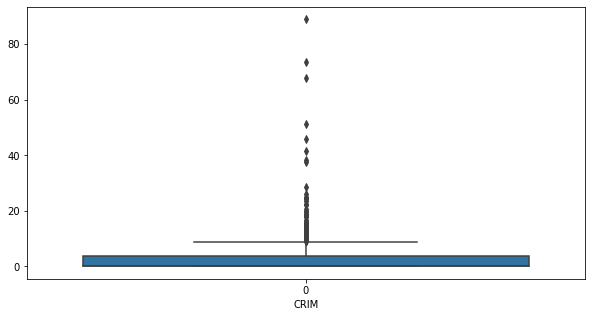

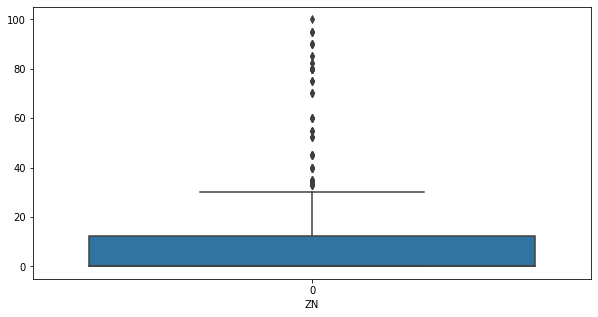

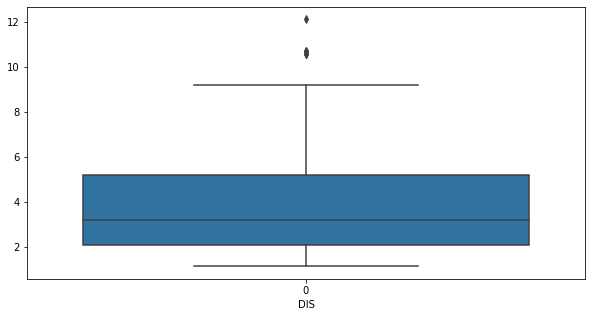

In [7]:
#boxplot to identify outliers
cols = ['CRIM', 'ZN', 'DIS']
cols = list(cols)
for i in cols:
    plt.figure(figsize=(10,5))
    plt.gca().set(xlabel = i)
    sns.boxplot(house_data[i])
plt.show()

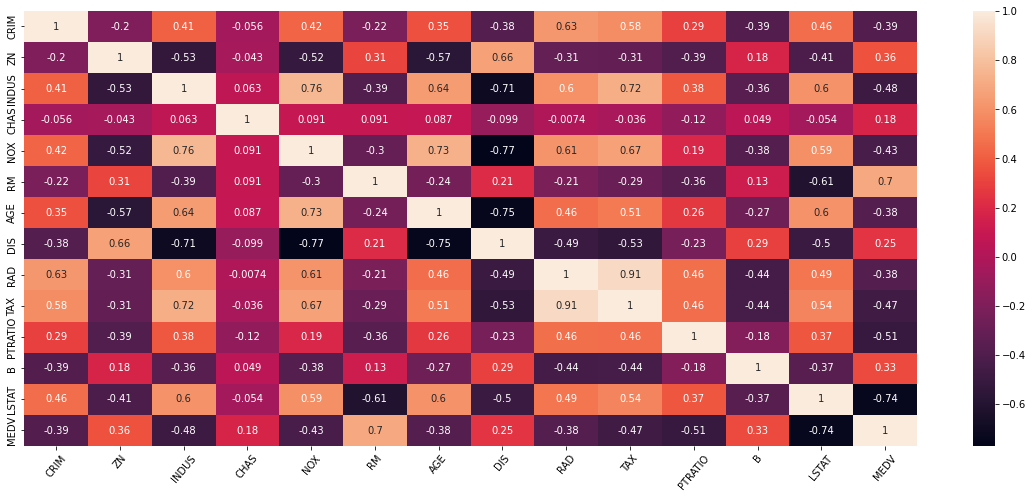

In [8]:
#correlation of features using a heat-map
plt.figure(figsize=(20,8))
sns.heatmap(house_data.corr(), xticklabels=house_data.corr().columns.values,
            yticklabels=house_data.corr().columns.values, annot=True);
plt.xticks(rotation=50)
plt.show()

The positively correlated feature with target variable, MEDV is : RM

The neagtively correlated features are: LSTAT, PTRATIO, INDUS, TAX

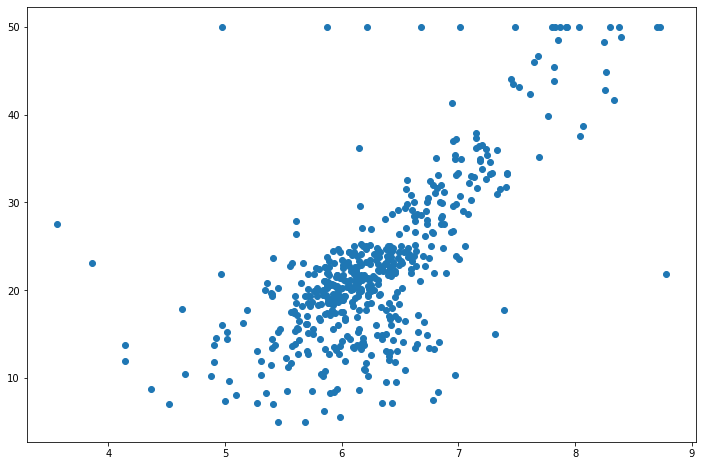

In [9]:
#plotting correlation between RM with MEDV
plt.figure(figsize=(12,8))
plt.scatter(house_data['RM'], house_data['MEDV'])
#The plot shows a linear positive correlation

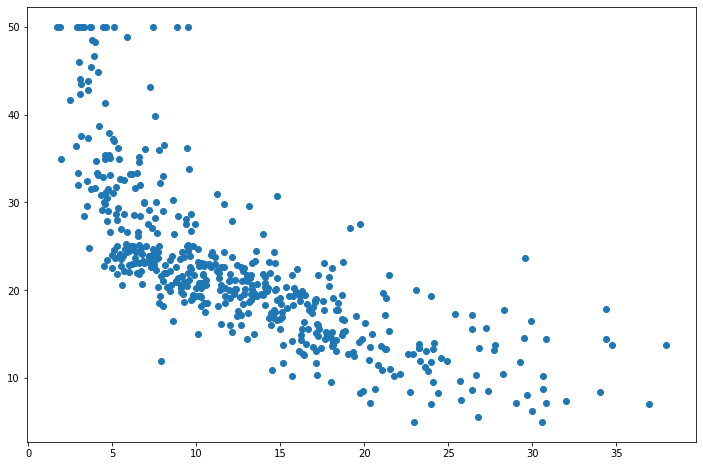

In [10]:
#plotting correlation between LSTAT with MEDV
plt.figure(figsize=(12,8))
plt.scatter(house_data['LSTAT'], house_data['MEDV'])
#The plot shows a negative linear correlation

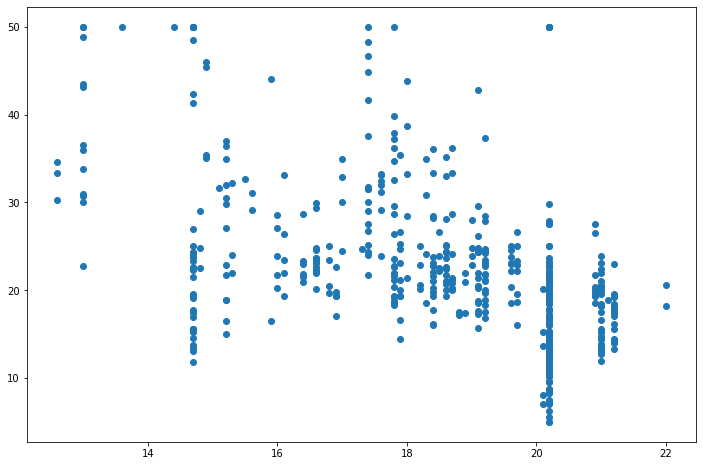

In [11]:
#plotting correlation between PTRATIO with MEDV
plt.figure(figsize=(12,8))
plt.scatter(house_data['PTRATIO'], house_data['MEDV'])

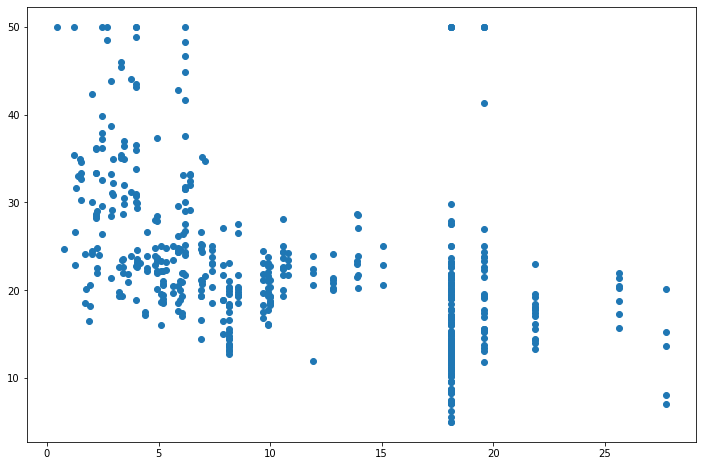

In [12]:
#plotting correlation between INDUS with MEDV
plt.figure(figsize=(12,8))
plt.scatter(house_data['INDUS'], house_data['MEDV'])

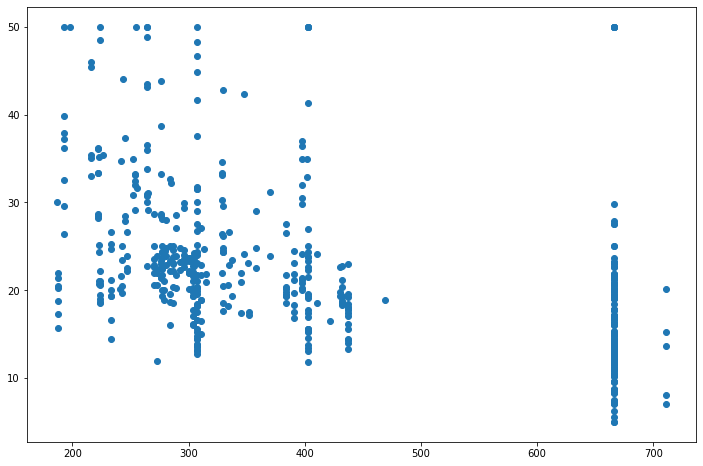

In [13]:
#plotting correlation between TAX with MEDV
plt.figure(figsize=(12,8))
plt.scatter(house_data['TAX'], house_data['MEDV'])

There's no significant correlation of MEDV with PTRATIO, INDUS, TAX. So, it is better to check correlation with at least 70%. Let's find correlation between other variables:

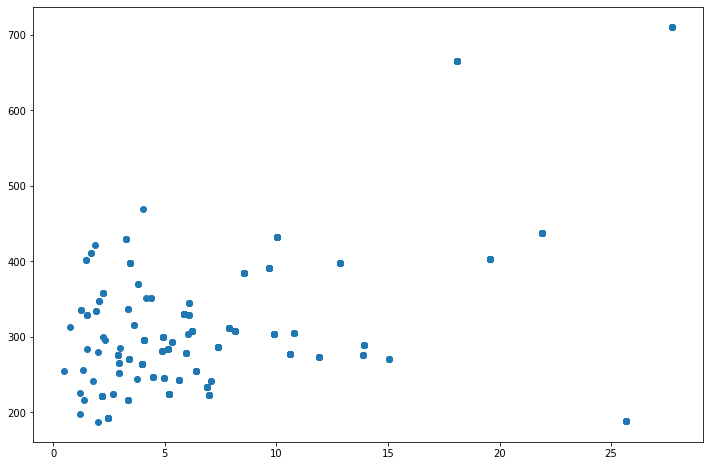

In [14]:
#plotting correlation between INDUS with TAX
plt.figure(figsize=(12,8))
plt.scatter(house_data['INDUS'], house_data['TAX'])

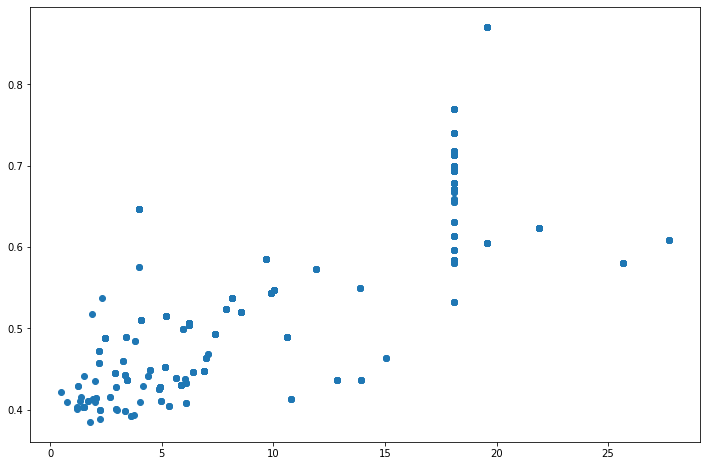

In [15]:
#plotting correlation between INDUS with NOX
plt.figure(figsize=(12,8))
plt.scatter(house_data['INDUS'], house_data['NOX'])

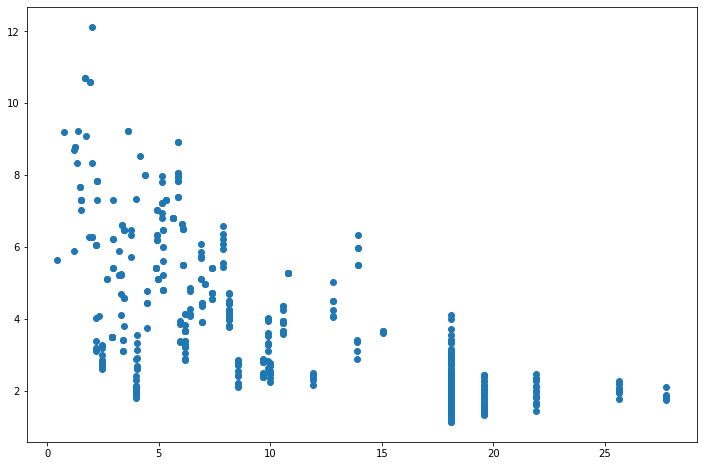

In [16]:
#plotting correlation between INDUS with DIS
plt.figure(figsize=(12,8))
plt.scatter(house_data['INDUS'], house_data['DIS'])

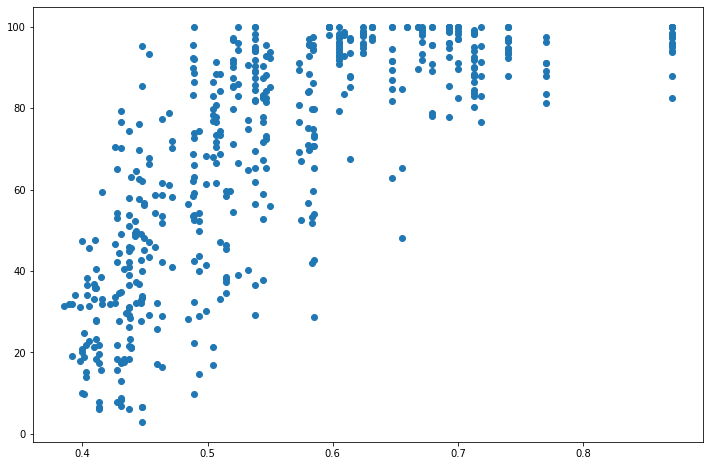

In [17]:
#plotting correlation between NOX with AGE
plt.figure(figsize=(12,8))
plt.scatter(house_data['NOX'], house_data['AGE'])

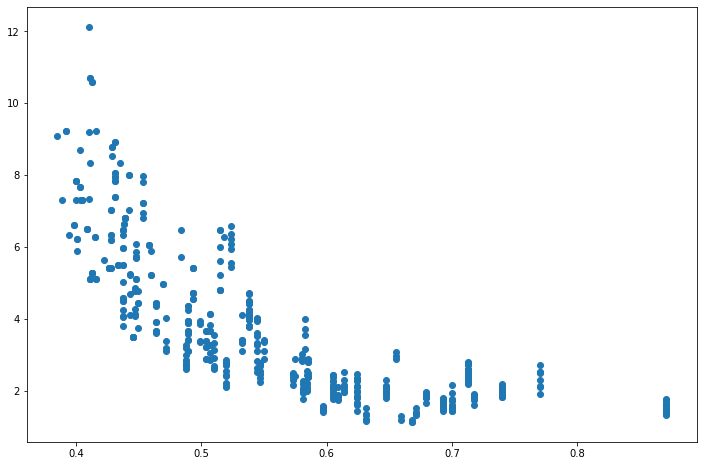

In [18]:
#plotting correlation between NOX with DIS
plt.figure(figsize=(12,8))
plt.scatter(house_data['NOX'], house_data['DIS'])

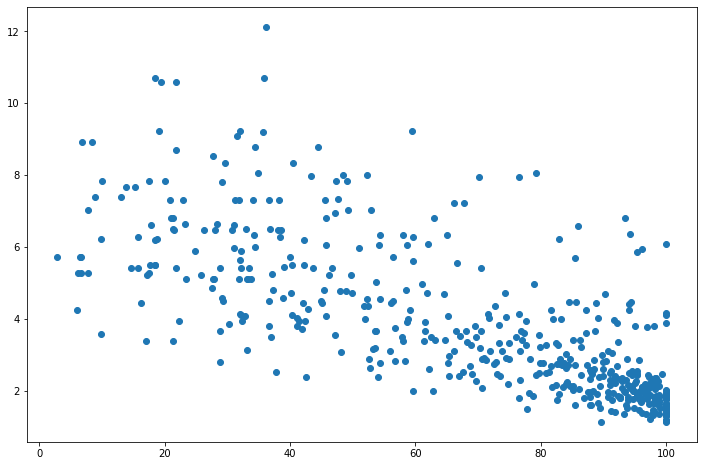

In [19]:
#plotting correlation between AGE with DIS
plt.figure(figsize=(12,8))
plt.scatter(house_data['AGE'], house_data['DIS'])

The above plots shows the following correlation:

Linear(Positive/Increasing): "INDUS with TAX", "INDUS with NOX"

Linear(Negative/Decreasing): "AGE with DIS"

Non-linear(Positive/Increasing): "NOX with AGE"

Non-linear(Negative/Decreasing): "INDUS with DIS", "NOX with DIS"


This shows that there could be multi-collinearity among the parameters. 

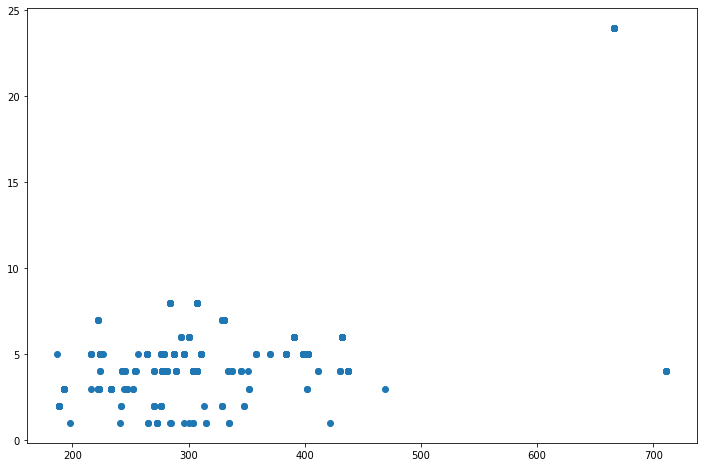

In [20]:
#plotting correlation between TAX with RAD
plt.figure(figsize=(12,8))
plt.scatter(house_data['TAX'], house_data['RAD'])

There is high correlation but there is no trend to be found in this plot.

In [21]:
house_data['TAX'].corr(house_data['RAD'], method = 'spearman')

0.7048757244922311

In [22]:
#Removing the tax outliers above 600
house_data = house_data[house_data['TAX']<600]

In [23]:
#After removing the outliers
house_data['TAX'].corr(house_data['RAD'], method = 'spearman')

0.3334688853232745

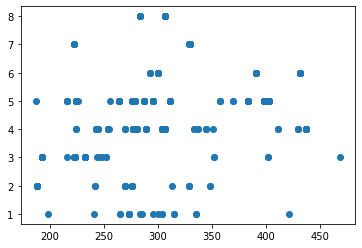

In [24]:
#plt.figure(figsize=(12,8))
plt.scatter(house_data['TAX'], house_data['RAD'])

So, the high correlation was due to the outliers and after removing them, there is no significant correlation between TAX and RAD.

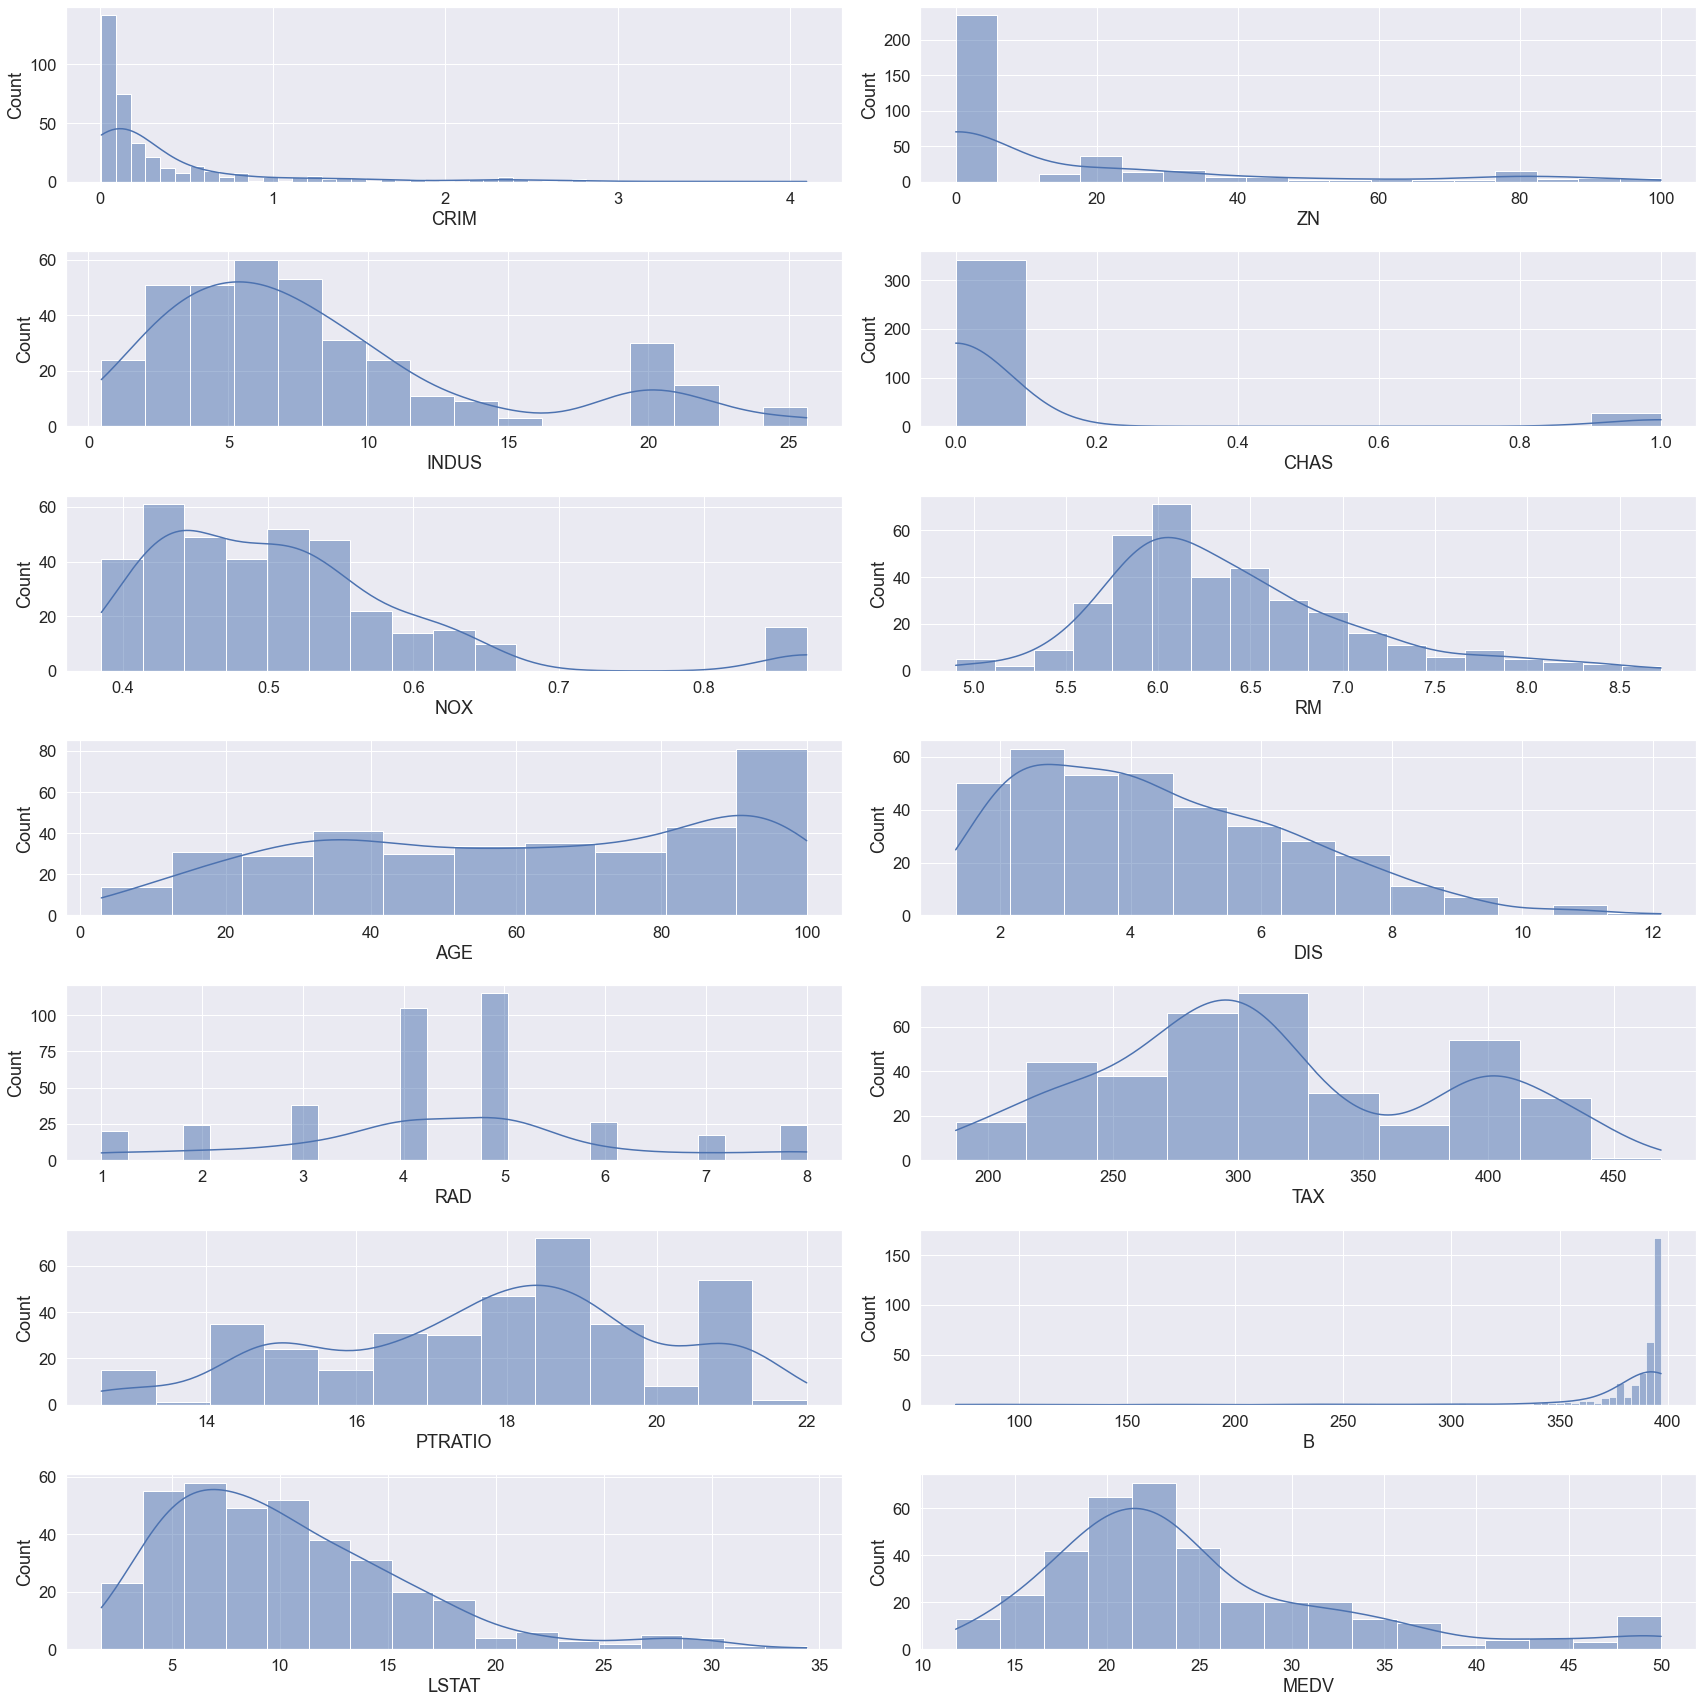

In [25]:
#visualising columnwise distributions
sns.set(rc = {'figure.figsize': (24,24)}, font_scale=1.5)
i = 1
for col in house_data.columns:
    plt.subplot(7,2,i)
    sns.histplot(data = house_data, x = col, kde = True)
    i = i+1
plt.tight_layout()
plt.show()

Since the target variable is skewed, it is better to log transform the data.

In [26]:
#log transform to remove the skewness from the target variable
house_data['MEDV'] = np.log(house_data['MEDV'])

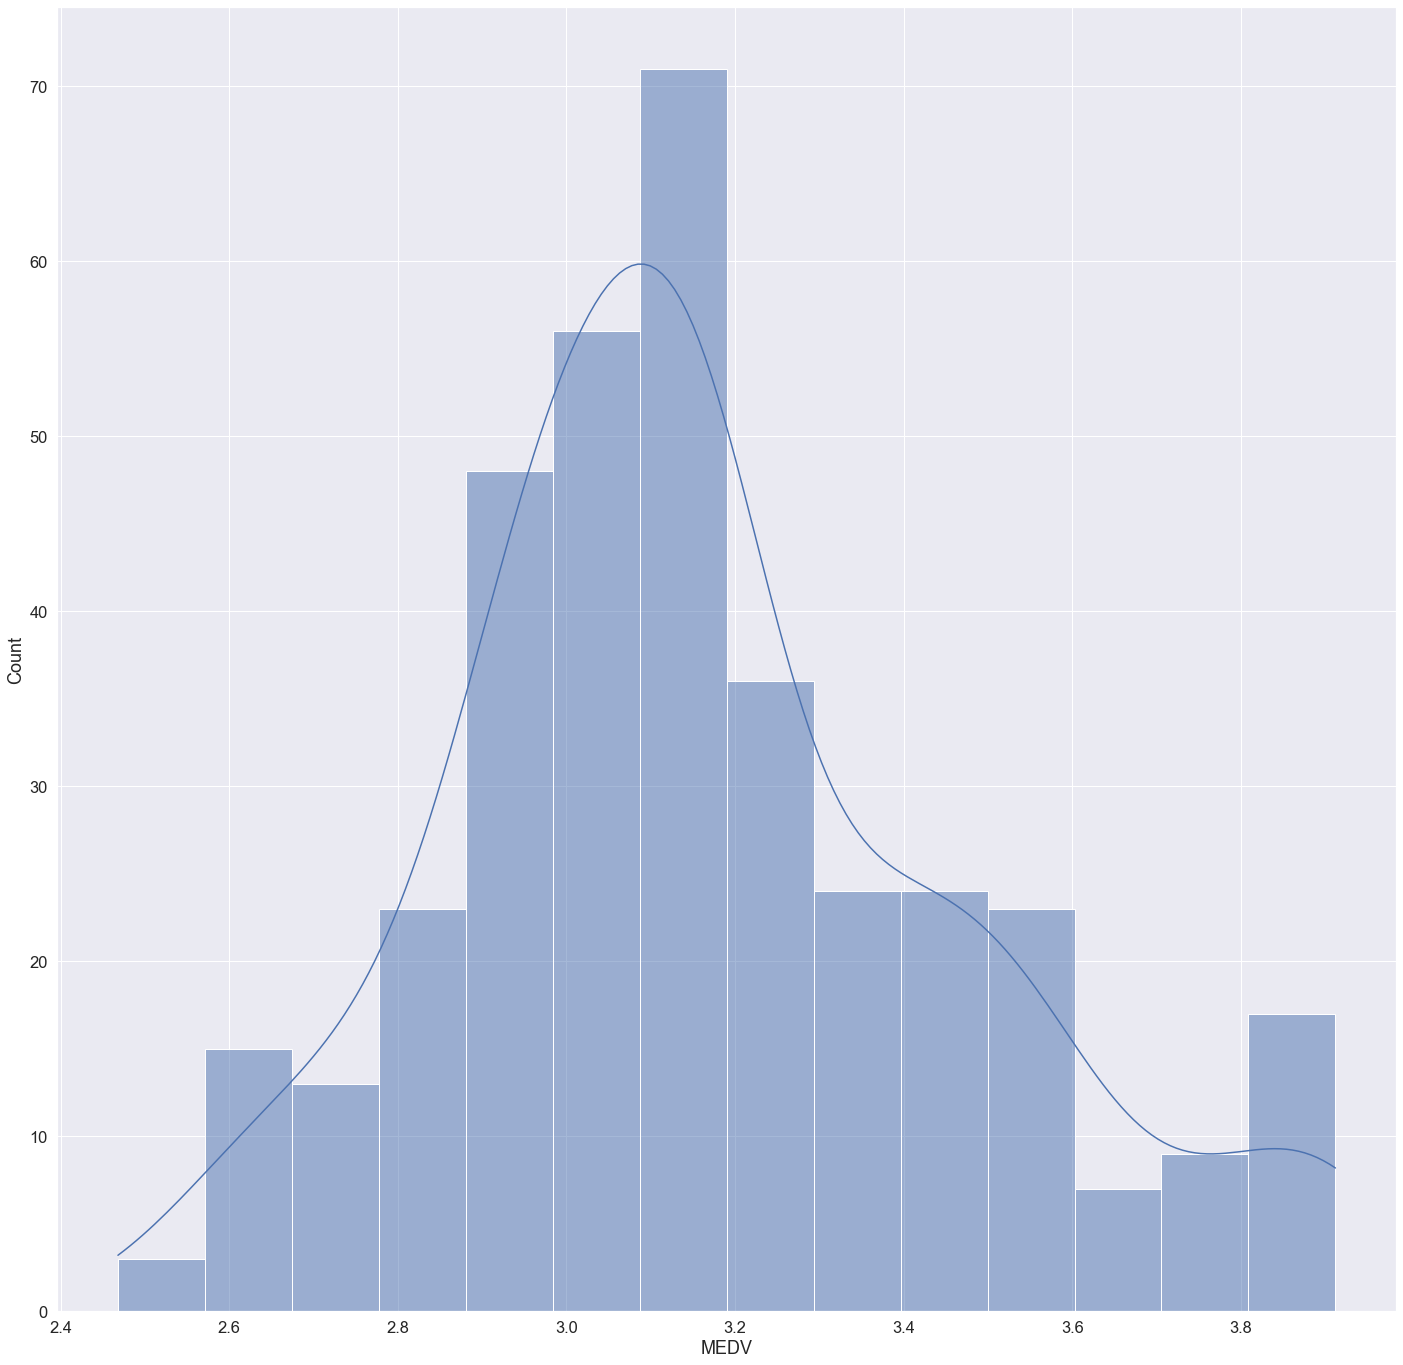

In [27]:
#plt.figure(figsize=(12,8))
sns.histplot(data = house_data, x = 'MEDV', kde = True)
plt.show()

In [28]:
from mpl_toolkits.mplot3d import Axes3D

###Hypothesis Testing 1###

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


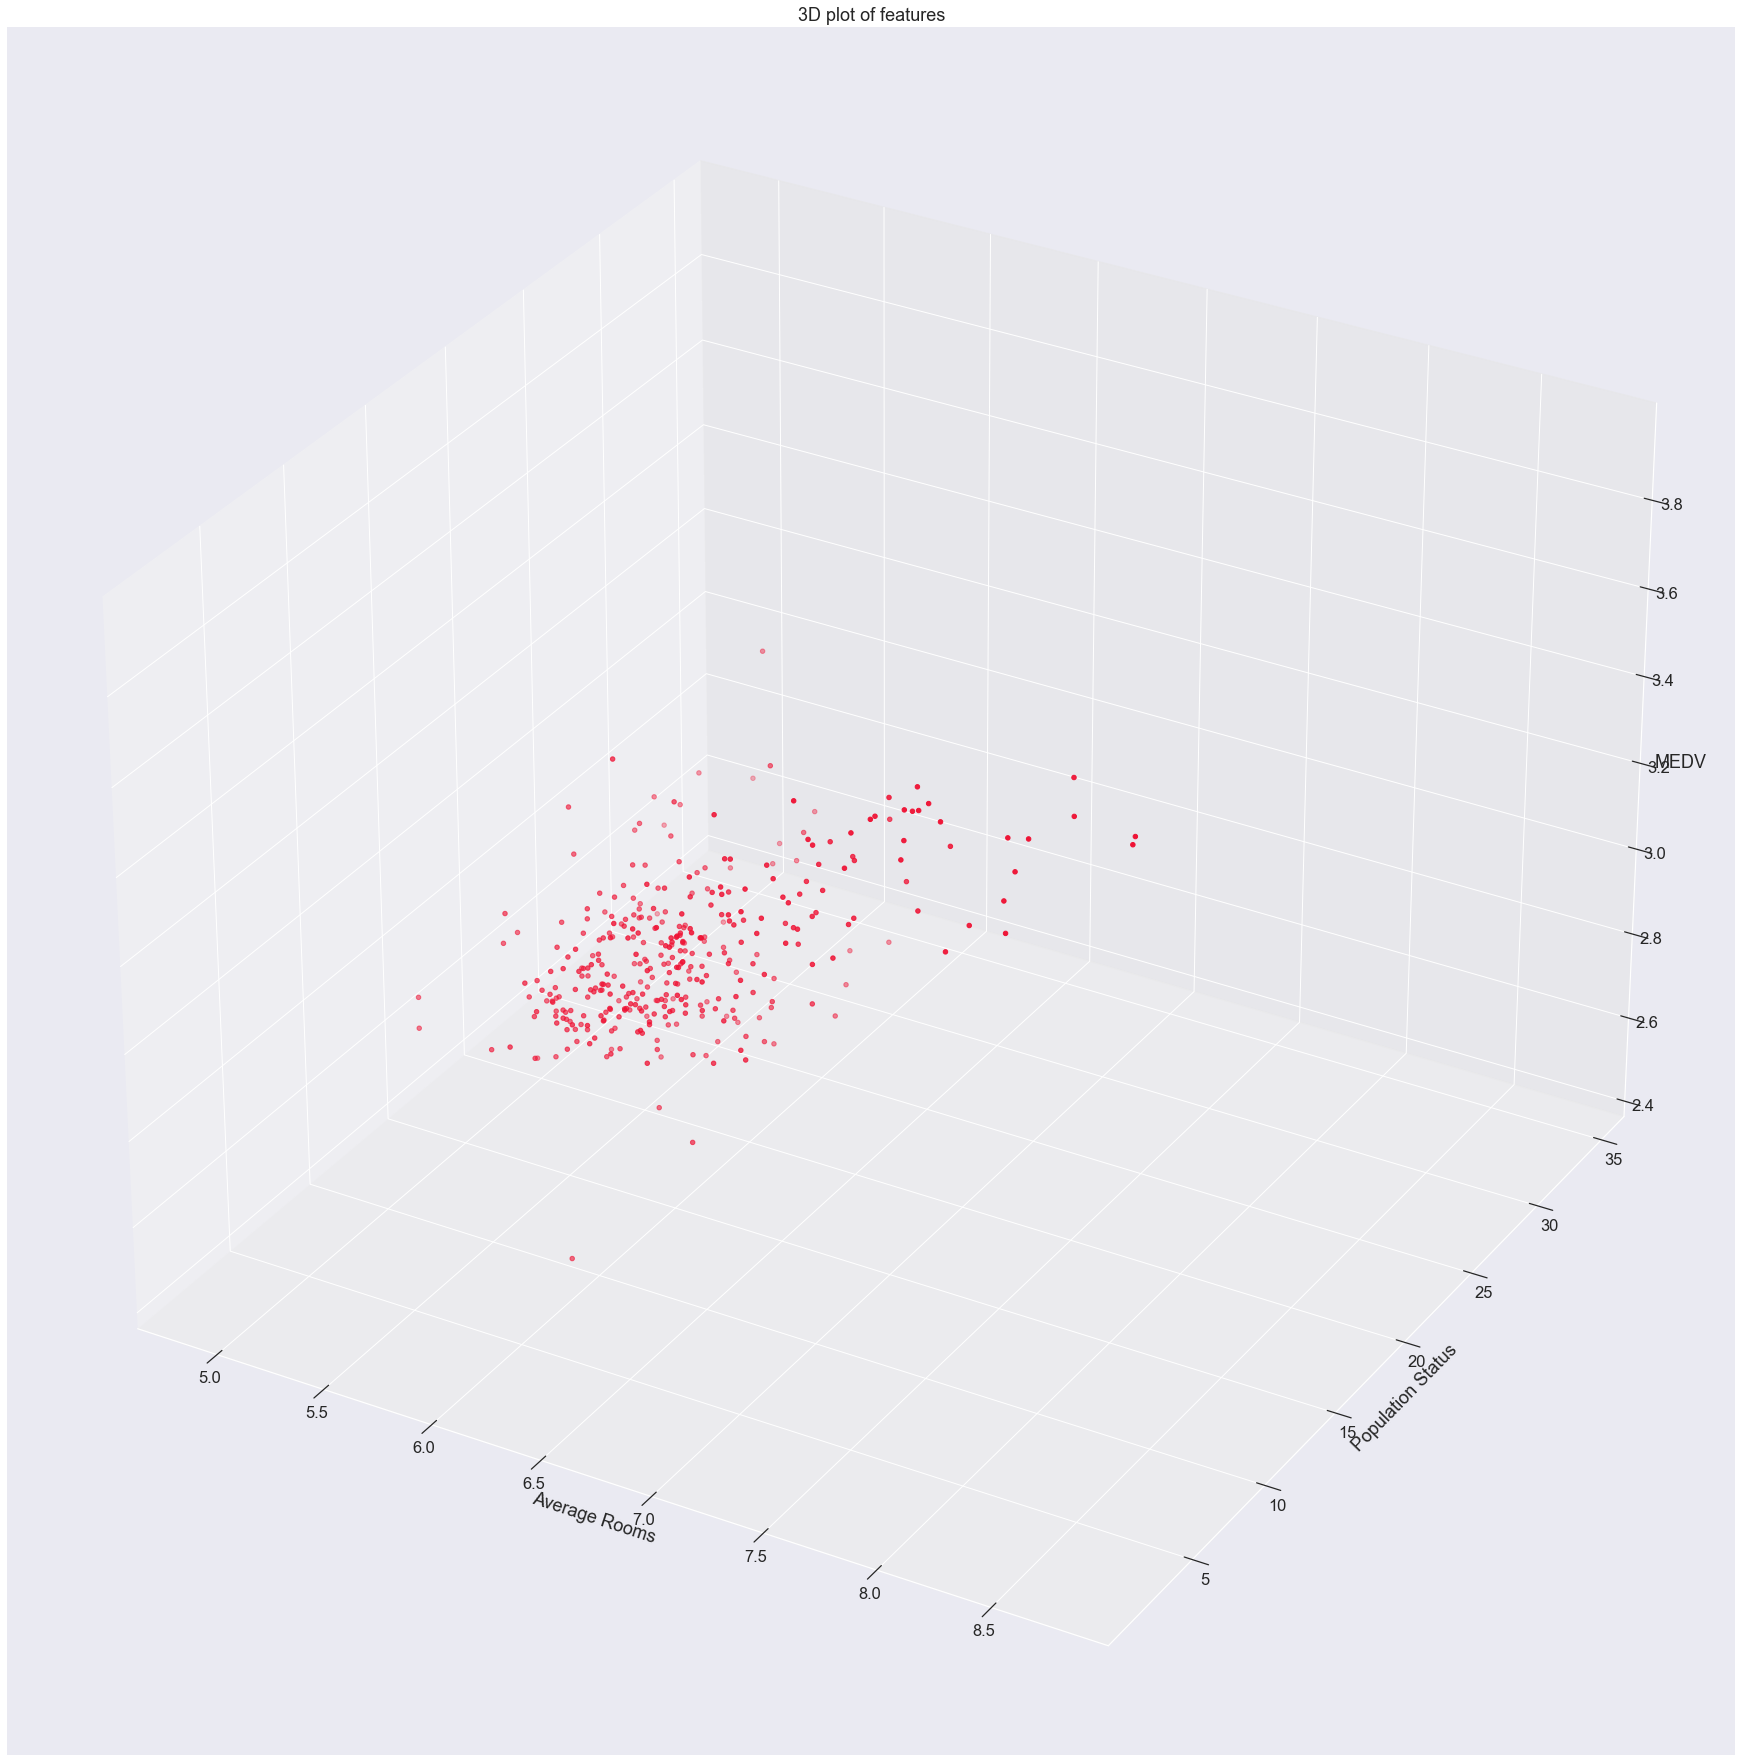

In [29]:
#using the cols with highes correlation with target variable
rm = house_data['RM'].values
lstat = house_data['LSTAT'].values
medv = house_data['MEDV'].values

#plotting
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(rm, lstat, medv, color='#ef1234')
ax.set_xlabel('Average Rooms')
ax.set_ylabel('Population Status')
ax.set_zlabel('MEDV')
ax.set_title(r'3D plot of features')
plt.show()

In [30]:
#generating coefficients
tot_val = len(lstat)
x0 = np.ones(tot_val)
X = np.array([x0, rm, lstat]).T
#initial coefficients
W = np.array([0, 0, 0])
Y = np.array(medv)
alpha = 0.001

In [31]:
#define cost function
def cost_function(X,Y,W):
    m = len(Y)
    J = np.sum((X.dot(W)-Y)**2)/(2*m)
    return J

In [32]:
initial_cost = cost_function(X,Y,W)
print(initial_cost)

5.052738830118798


In [33]:
#gradient Descent
def gradient_descent(X, Y, W, alpha, iterations):
    cost_history = [0]*iterations
    m = len(Y)
    
    for iteration in range(iterations):
        #hypothesis valuess
        h=X.dot(W)
        #difference b/w hypothesis and actual Y
        loss = h-Y
        #gradient calculation
        gradient = X.T.dot(loss)/m
        #changing values of W using Gradient
        W = W-alpha*gradient
        #new cost value
        cost = cost_function(X,Y,W)
        cost_history[iteration]=cost
    return W, cost_history

In [34]:
#100000 iterations
newW, cost_history = gradient_descent(X, Y, W, alpha, 100000)

#new values of B
print(newW)

#final cost of B
print(cost_history[-1])

[ 0.50116312  0.42272725 -0.00390919]
0.0110806137601863


In this model,

S(medv) = 0.50116312 + 0.42272725*S(rm) - 0.00390919*S(lstat)
This is the final hypothesis functions for our model

In [35]:
#Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y-Y_pred)**2)/len(Y))
    return rmse

#Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_Y = np.mean(Y)
    ss_tot = sum((Y - mean_Y)**2)
    ss_res = sum((Y - Y_pred)**2)
    r2 = 1 - (ss_res/ss_tot)
    return r2

Y_pred = X.dot(newW)

print("Root Mean Square Error :", rmse(Y, Y_pred))
print("R2 Score : ", r2_score(Y, Y_pred))

Root Mean Square Error : 0.14886647547508006
R2 Score :  0.7613731839210633


In [36]:
house_dataset = house_data.copy()

In [37]:
import statsmodels.api as sm

In [38]:
#splitting data
Y = house_data['MEDV']
X = house_data.drop(columns = 'MEDV')
X = sm.add_constant(X)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [39]:
#Chalculating VIF Factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns

In [40]:
#Inspecting VIF Factors
vif.round(1)

,VIF Factor,features
0,847.2,const
1,2.9,CRIM
2,2.3,ZN
3,2.5,INDUS
4,1.1,CHAS
5,4.8,NOX
6,2.5,RM
7,2.7,AGE
8,3.3,DIS
9,1.2,RAD


The VIF factor for 'NOX' is higher which could be causing multi-collinearity as we have already seen its high correlation with 'INDUS', 'AGE' and 'DIS'. So, let's drop thi scolumn and see the model performance.

In [41]:
X.drop(['NOX'], axis =1, inplace = True)

In [42]:
#splitting into test and train
lr_model = sm.OLS(Y, X).fit()
predictions = lr_model.predict(X)

print_model = lr_model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     196.6
Date:                Fri, 26 May 2023   Prob (F-statistic):          7.27e-149
Time:                        20:09:23   Log-Likelihood:                 289.70
No. Observations:                 369   AIC:                            -553.4
Df Residuals:                     356   BIC:                            -502.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9820      0.145     13.662      0.0

The P-value for 'CRIM', 'ZN' and 'INDUS' but the coefficients as well as t-value are very low which makes it insignificant. Let's drop these columns and check the model performance.

In [43]:
X.drop(['INDUS', 'CRIM', 'ZN'], axis =1, inplace = True)

In [44]:
#splitting into test and train
lr_model = sm.OLS(Y, X).fit()
predictions = lr_model.predict(X)

print_model = lr_model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     262.1
Date:                Fri, 26 May 2023   Prob (F-statistic):          6.46e-152
Time:                        20:09:23   Log-Likelihood:                 288.40
No. Observations:                 369   AIC:                            -556.8
Df Residuals:                     359   BIC:                            -517.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9563      0.136     14.418      0.0

In [45]:
x = pd.DataFrame(np.c_[house_data['LSTAT'], house_data['RM']], columns=['LSTAT', 'RM'])
y = house_data['MEDV']

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [47]:
#create instance of the model
linear_reg_mod = LinearRegression()
linear_reg_mod.fit(x_train, y_train)

LinearRegression()

In [48]:
train_pred = linear_reg_mod.predict(x_train)
#making predictions
test_pred = linear_reg_mod.predict(x_test)

In [49]:
#RMSE and R2-Score on train predictions
rmse = (np.sqrt(mean_squared_error(y_train, train_pred)))
print("Root Mean Square Error: ", rmse)
r2 = r2_score(y_train, train_pred)
print("R2 score: ", r2)

Root Mean Square Error:  0.13772109367978258
R2 score:  0.787691244955585


In [50]:
#RMSE and R2-Score on test predictions
rmse = (np.sqrt(mean_squared_error(y_test, test_pred)))
print("Root Mean Square Error: ", rmse)
r2 = r2_score(y_test, test_pred)
print("R2 score: ", r2)

Root Mean Square Error:  0.14740502200019476
R2 score:  0.7968394410706751


In [51]:
#verify using stats model
y = list(y)
x_stat = sm.add_constant(x)
model_bh = sm.OLS(y, x_stat).fit()
model_bh.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:130: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     689.7
Date:                Fri, 26 May 2023   Prob (F-statistic):          7.05e-125
Time:                        20:09:23   Log-Likelihood:                 203.10
No. Observations:                 369   AIC:                            -400.2
Df Residuals:                     366   BIC:                            -388.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2665      0.108     11.761      0.000       1.055       1.478
LSTAT         -0.0131      0.002     -7.689      0.000      -0.016      -0.010
RM             0.3185      0.015     21.502      0.000       0.289       0.348
==============================================================================
Omnibus:                       16.126   Durbin-Watson:                   0.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.632
Skew:                           0.049   Prob(JB):                     2.48e-09
Kurtosis:                       4.603   Cond. No.                         197.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
X.columns

Index(['const', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

In [53]:
X.drop('const',axis=1, inplace=True)

In [54]:
X.shape

(369, 9)

In [55]:
Y

0      3.178054
1      3.072693
2      3.546740
3      3.508556
4      3.589059
         ...   
501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: MEDV, Length: 369, dtype: float64

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state = 42)

In [57]:
#Model Fitting
X_param = pd.DataFrame()

l_reg = LinearRegression()
l_reg.fit(X_train, Y_train)

LinearRegression()

In [58]:
l_reg.coef_

array([ 0.05066343,  0.2900703 , -0.00230922, -0.02655367,  0.00969636,
       -0.0004758 , -0.02563065,  0.00052637, -0.00771986])

In [59]:
print('Intercept Coefficient: ', linear_reg_mod.intercept_)
X_param['Linear_Regression'] = l_reg.coef_

Intercept Coefficient:  1.309549423020097


In [60]:
#storing features in predictors to plot coefficients
predictors = X_train.columns

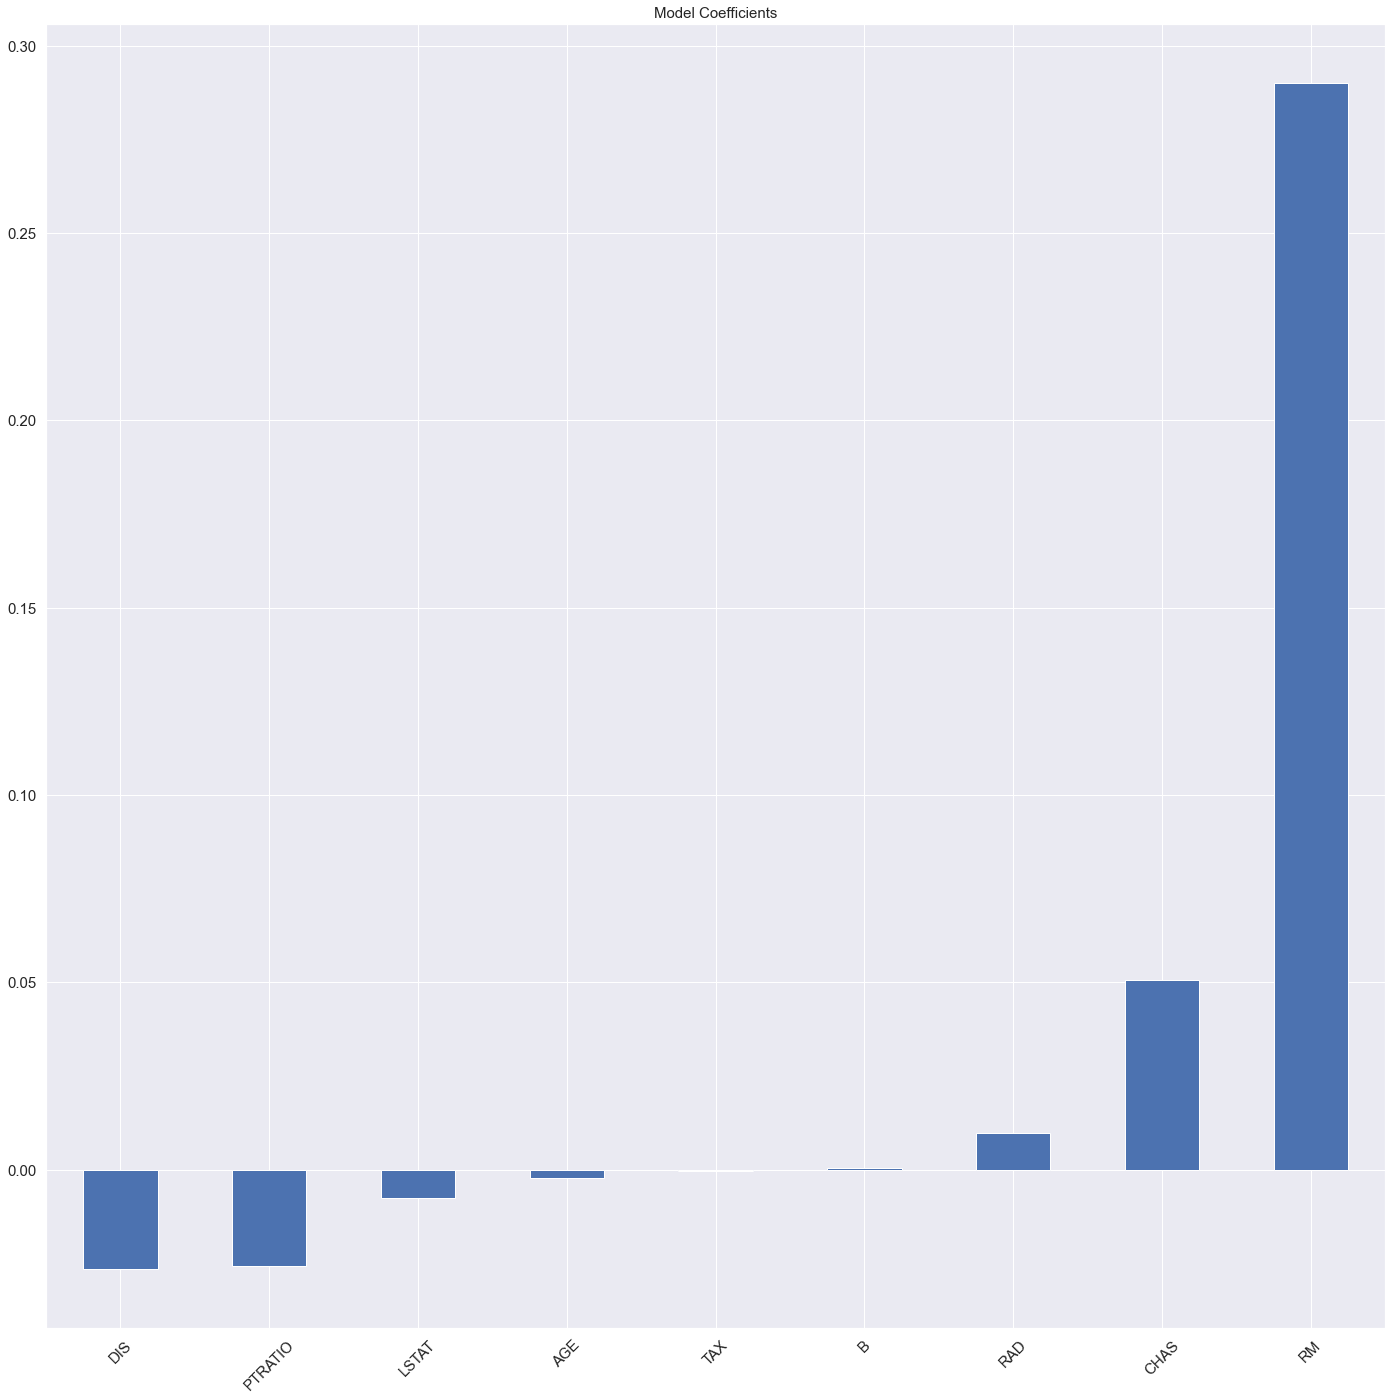

In [61]:
coef = pd.Series(l_reg.coef_,predictors).sort_values()
coef.plot(kind='bar',fontsize=15)
plt.title('Model Coefficients', fontsize=15)
plt.xticks(rotation=45)
plt.show()

From the above graph, we see that the coeefficients of feature'RM' is much higher compared to rest of the features. Therefore, estimated relative performance from the original would rely mostly on this feature.

In [62]:
#MSE and Accuracy
predict = l_reg.predict(X_test)

mse = np.mean((predict-Y_test)**2)
print("Mean Square Error: ", mse)

accuracy = l_reg.score(X_test, Y_test)
print("Accuracy: ", accuracy)

Mean Square Error:  0.00999067949028935
Accuracy:  0.8786220113774855


###Ridge###

In [63]:
from sklearn.linear_model import Ridge

l_ridge = Ridge(alpha = 0.3, random_state=0)
l_ridge.fit(X_train, Y_train)

Ridge(alpha=0.3, random_state=0)

In [64]:
print('Intercept Coefficient: ', l_ridge.intercept_)
X_param['Ridge'] = l_ridge.coef_

Intercept Coefficient:  2.0258442181457026


In [65]:
l_ridge.coef_

array([ 0.05010424,  0.2885689 , -0.00230071, -0.02657184,  0.00970905,
       -0.00047729, -0.02573027,  0.00052846, -0.00784712])

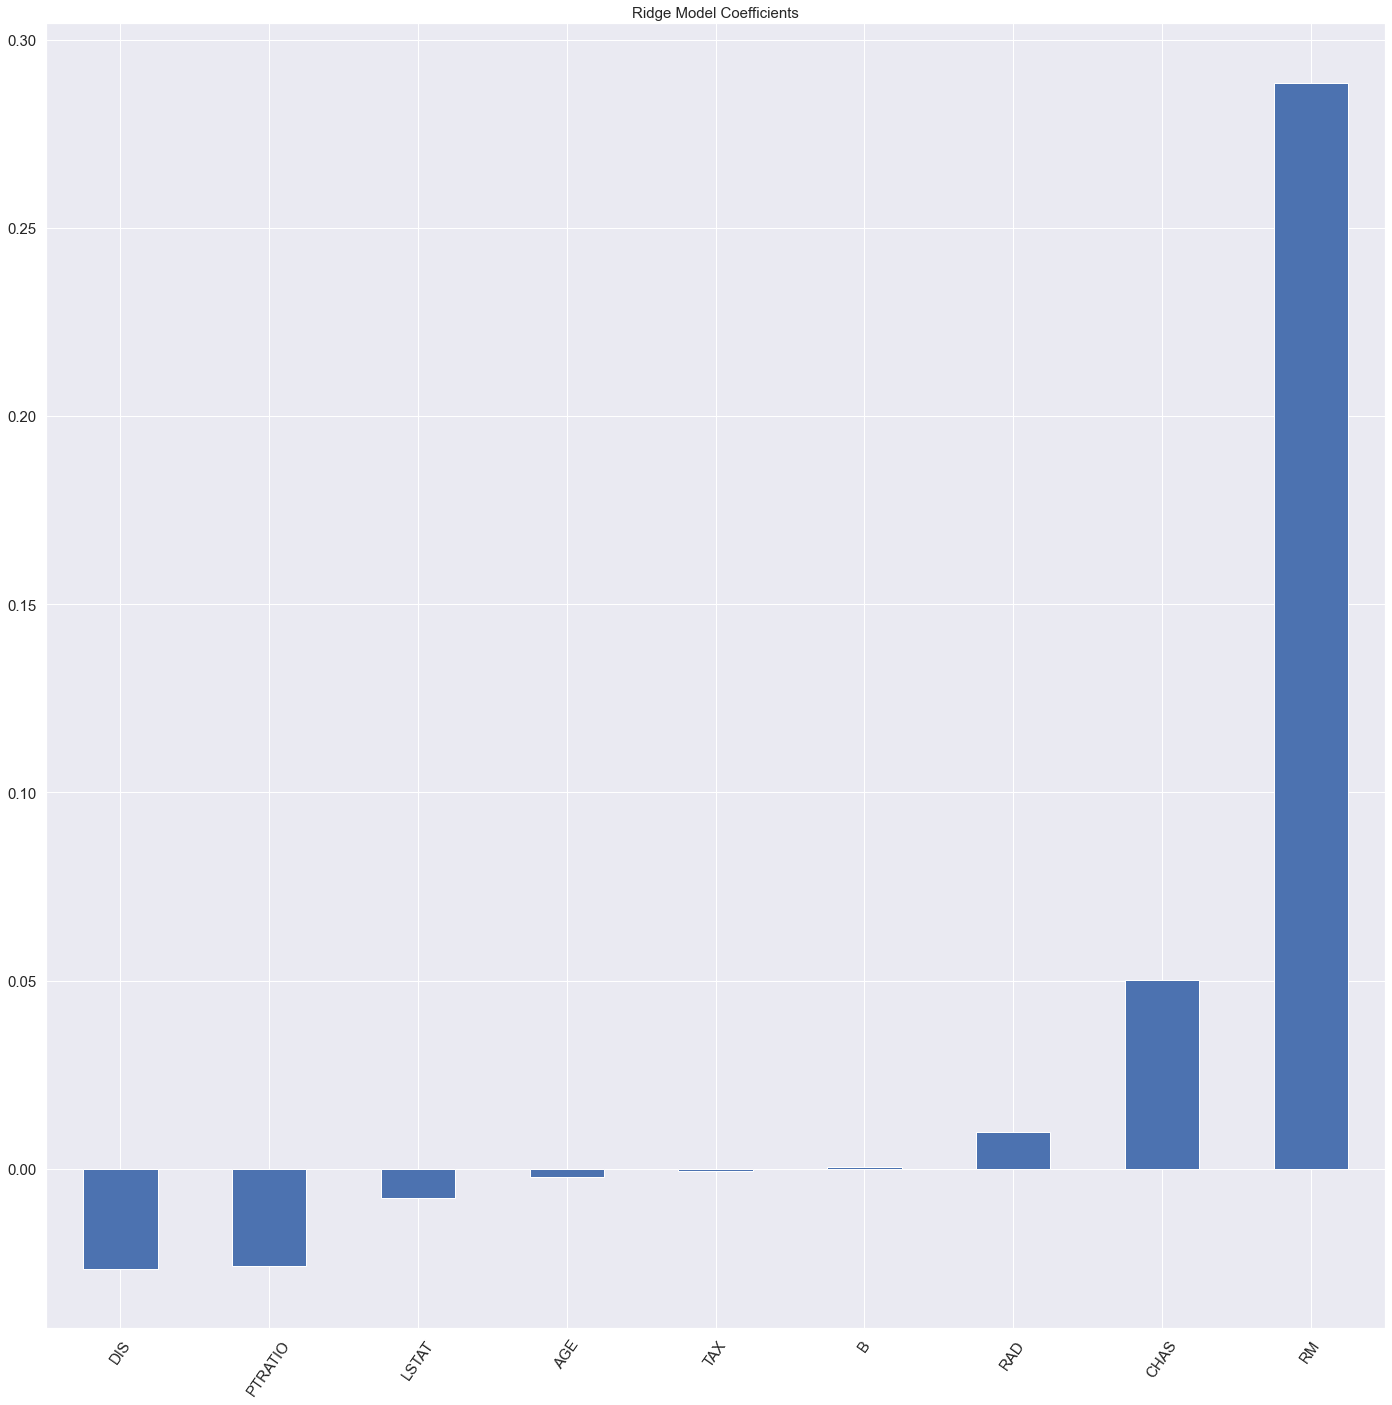

In [66]:
rdge_coef = pd.Series(l_ridge.coef_,predictors).sort_values()
rdge_coef.plot(kind='bar', fontsize=15)
plt.title("Ridge Model Coefficients", fontsize=15)
plt.xticks(rotation=55)
plt.show()

In [67]:
#MSE and Accuracy
ridge_predict = l_ridge.predict(X_test)

ridge_mse = np.mean((ridge_predict-Y_test)**2)
print("Mean Square Error", ridge_mse)

score = l_ridge.score(X_test,Y_test)
print("Accuracy: ", score)

Mean Square Error 0.009981713690630334
Accuracy:  0.8787309379755274


###Lasso###

In [68]:
from sklearn.linear_model import Lasso

l_lasso = Lasso(alpha = 0.003, random_state=0)
l_lasso.fit(X_train, Y_train)

Lasso(alpha=0.003, random_state=0)

In [69]:
print('Intercept Coefficient: ', l_lasso.intercept_)
X_param['Lasso'] = l_lasso.coef_

Intercept Coefficient:  2.1010882328333724


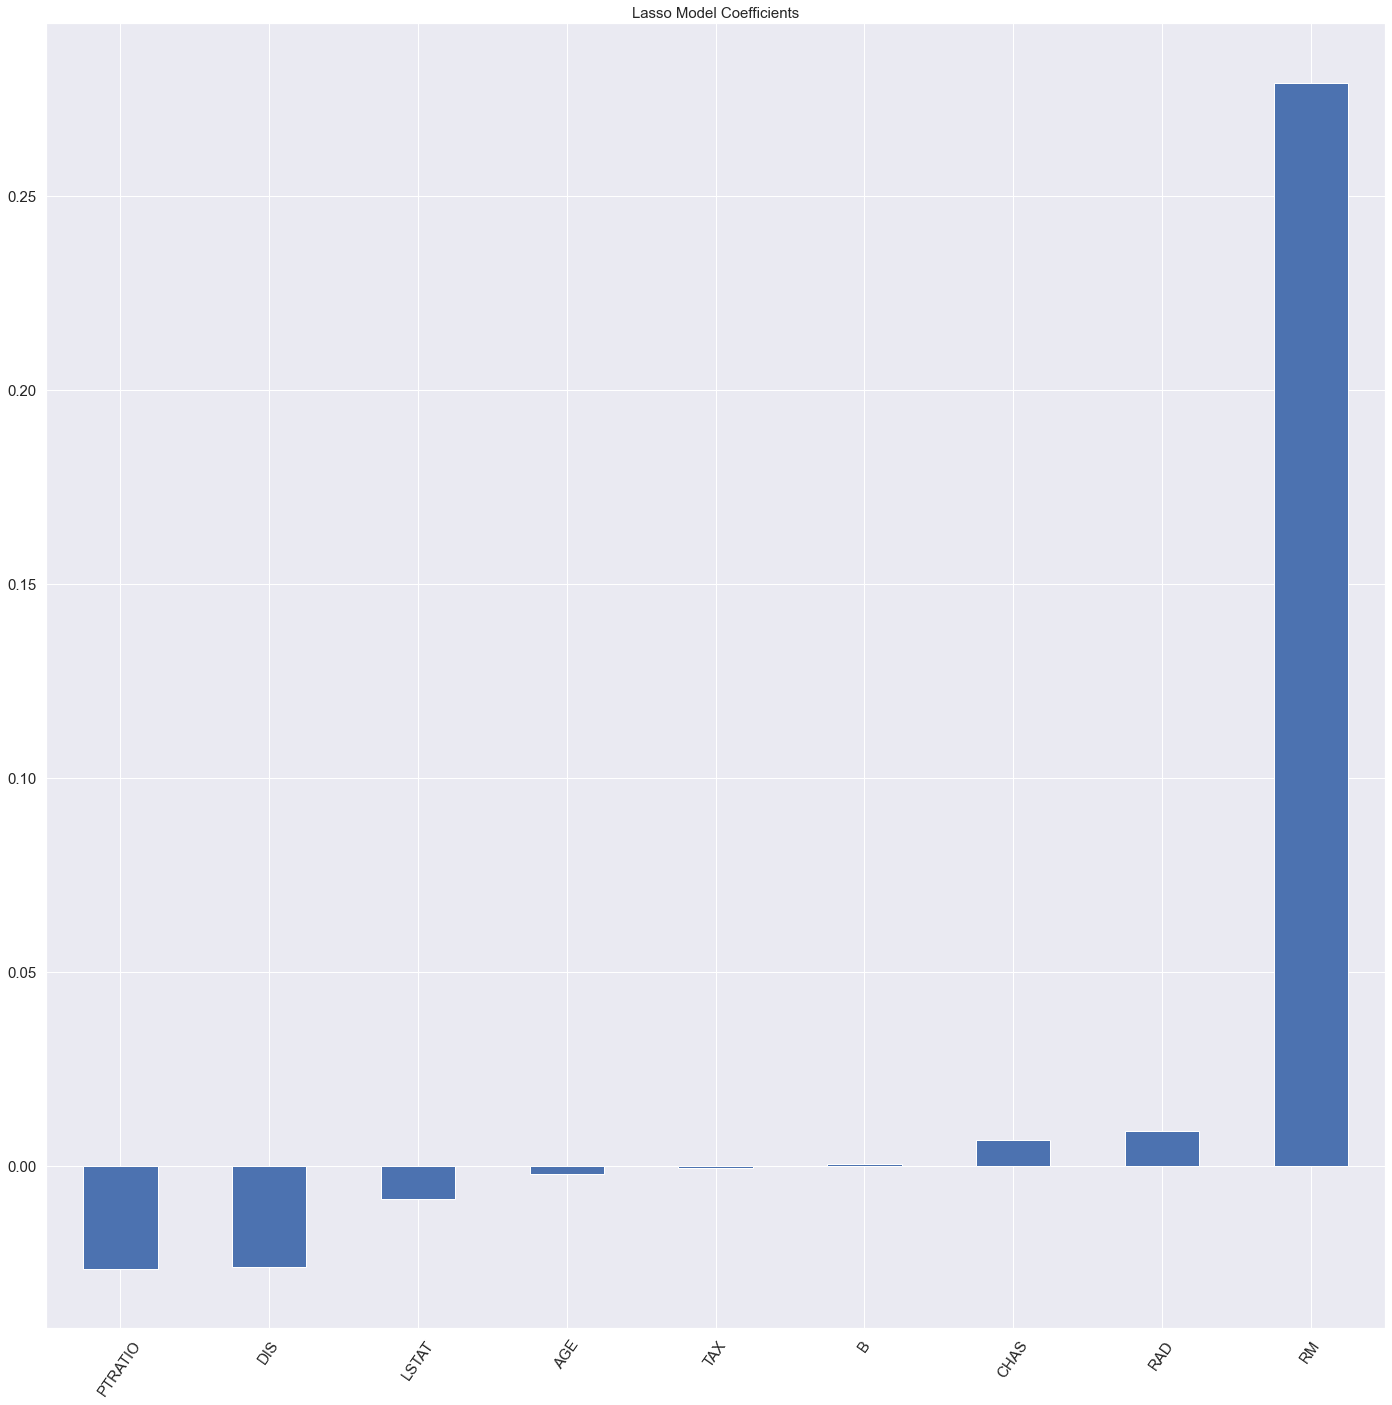

In [70]:
lasso_coef = pd.Series(l_lasso.coef_,predictors).sort_values()
lasso_coef.plot(kind='bar', fontsize=15)
plt.title("Lasso Model Coefficients", fontsize=15)
plt.xticks(rotation=55)
plt.show()

In [71]:
#MSE and Accuracy
lasso_predict = l_lasso.predict(X_test)

lasso_mse = np.mean((lasso_predict-Y_test)**2)
print("Mean Square Error", lasso_mse)

score = l_lasso.score(X_test,Y_test)
print("Accuracy: ", score)

Mean Square Error 0.0097479982595618
Accuracy:  0.8815703753692217


In [72]:
#Parameter Tuning
from sklearn.model_selection import GridSearchCV

params ={'fit_intercept': [True,False], 'normalize':[True,False], 'copy_X':[True,False]}
grid=GridSearchCV(l_reg, params, cv=None, scoring='neg_mean_squared_error')
grid.fit(X_train,Y_train)
predictions1 = grid.predict
print("Mean Squared Error: ", grid.best_score_)
print("Residual Sum of squares:%.2f", np.mean((grid.predict(X_test)-Y_test)**2))
l_reg_est = grid.best_estimator_
print(l_reg_est)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

Mean Squared Error:  -0.01473679240583034
Residual Sum of squares:%.2f 0.009990679490289348
LinearRegression(normalize=True)


In [73]:
#Ridge Regression
params = {'alpha':[100, 10, 5, 3, 0.3, 0.03, 0.003, 0.005, 0.5]}
grid = GridSearchCV(l_ridge,params, cv=2, scoring = 'neg_mean_squared_error')
grid.fit(X_train,Y_train)
print("Mean squared Error: ", grid.best_score_)
print("Residual Sum of squares: %.2f", np.mean((grid.predict(X_test)-Y_test)**2))
l_rig_est = grid.best_estimator_
print(l_reg_est)

Mean squared Error:  -0.015154553312419796
Residual Sum of squares: %.2f 0.009948068451482424
LinearRegression(normalize=True)


In [74]:
#Lasso Regression
params = {'alpha':[100, 10, 5, 3, 0.3, 0.03, 0.003, 0.005, 0.5]}
grid = GridSearchCV(l_lasso,params, cv=2, scoring = 'neg_mean_squared_error')
grid.fit(X_train,Y_train)
print("Mean squared Error: ", grid.best_score_)
print("Residual Sum of squares: %.2f", np.mean((grid.predict(X_test)-Y_test)**2))
l_lasso_est = grid.best_estimator_
print(l_lasso_est)

Mean squared Error:  -0.01535480193589908
Residual Sum of squares: %.2f 0.0097479982595618
Lasso(alpha=0.003, random_state=0)


In [75]:
#Visualizing the Regression Model
max_coef = max(X_param['Linear_Regression'])
X_param[X_param['Linear_Regression']==max_coef]

,Linear_Regression,Ridge,Lasso
1,0.29007,0.288569,0.279232


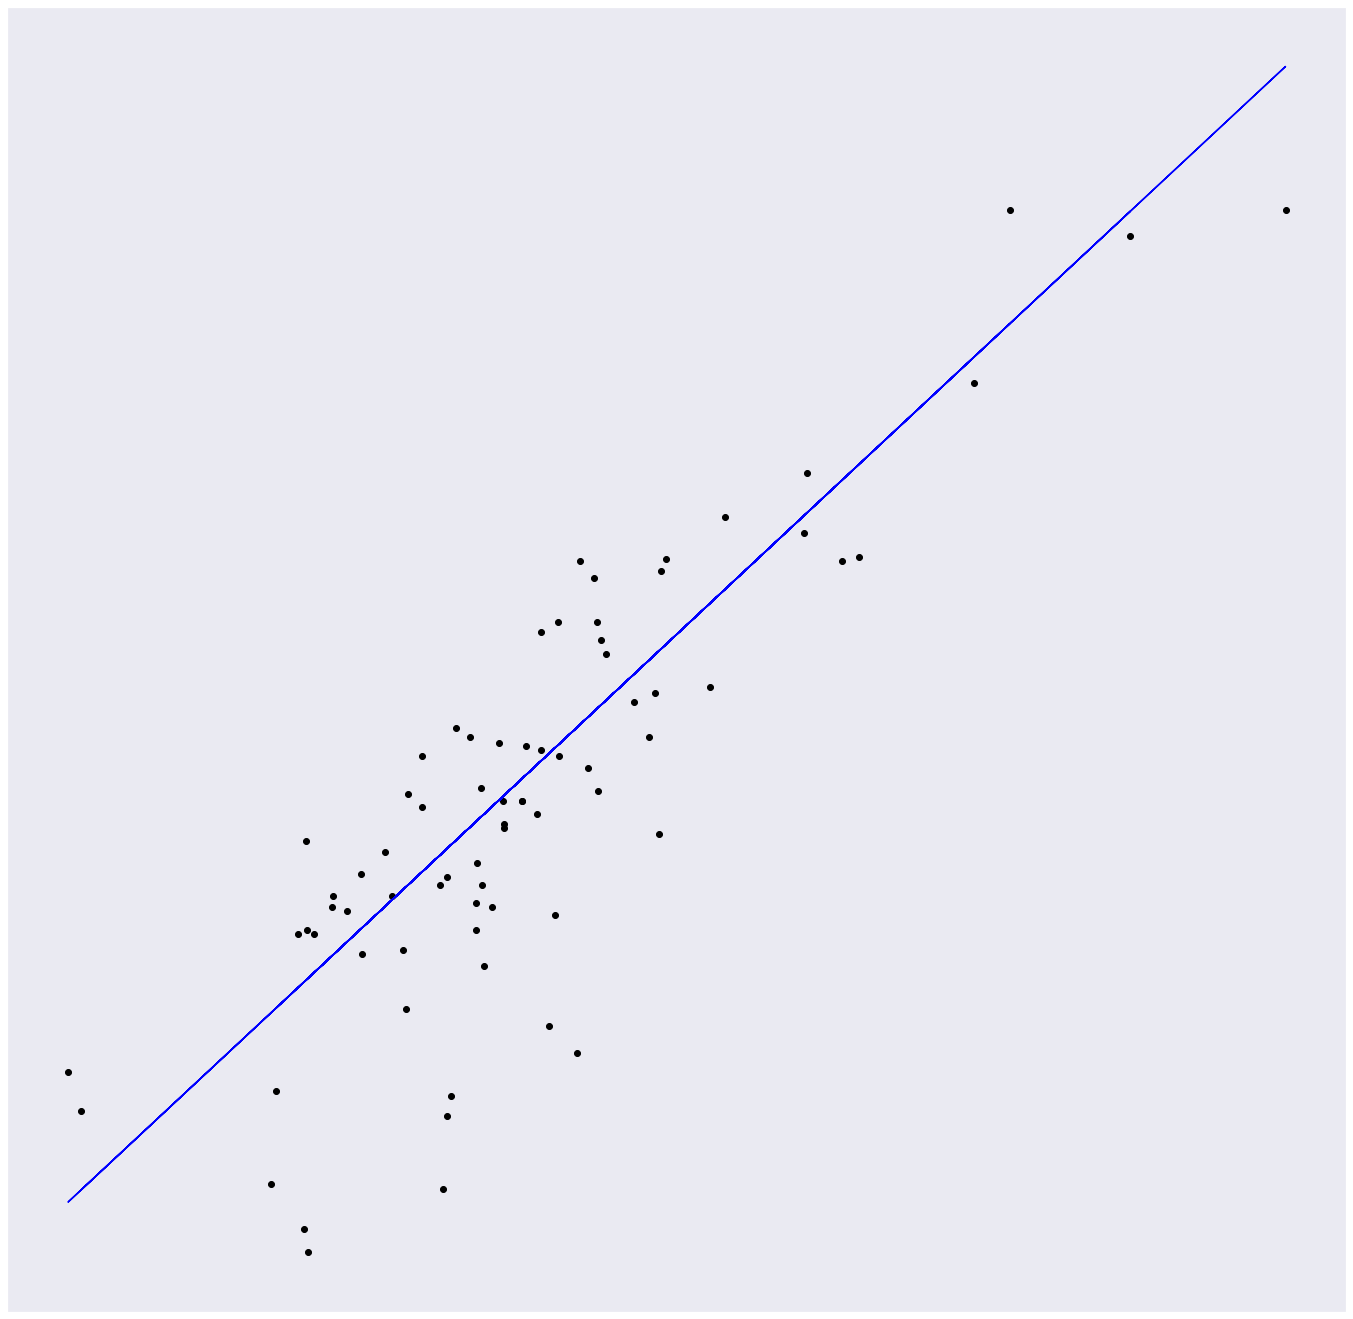

In [76]:
#Plotting the most significant value with target variable
X_train_temp = X_train['RM'].values.reshape(-1,1)
Y_train = Y_train.values.reshape(-1,1)
l_reg_vis = LinearRegression()
l_reg_vis.fit(X_train_temp, Y_train)

X_test_temp = X_test['RM'].values.reshape(-1,1)
Y_pred = l_reg_vis.predict(X_test_temp)
plt.scatter(X_test['RM'], Y_test, color='black')
plt.plot(X_test['RM'], Y_pred, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

In [77]:
#Metrics
from sklearn.model_selection import cross_validate

scoring = {'neg_mean_absolute_error',
           'neg_mean_squared_error',
           'r2'}

param_scores = pd.DataFrame()
for model in [l_reg, l_ridge, l_lasso]:
    scores = cross_validate(l_reg, X_train, Y_train, scoring=scoring, cv=5, return_train_score=True)
    score=[]
    for key in scores.keys():
        score.append(scores[key].mean())
    param_scores[str(model)]=score
    param_scores['metric_params']=scores.keys()
param_scores = param_scores.set_index('metric_params')

In [78]:
param_scores

,LinearRegression(),"Ridge(alpha=0.3, random_state=0)","Lasso(alpha=0.003, random_state=0)"
metric_params,,,
fit_time,0.002405,0.002485,0.002182
score_time,0.001981,0.002090,0.002393
test_neg_mean_absolute_error,-0.090781,-0.090781,-0.090781
train_neg_mean_absolute_error,-0.085118,-0.085118,-0.085118
test_r2,0.839052,0.839052,0.839052
train_r2,0.864782,0.864782,0.864782
test_neg_mean_squared_error,-0.014737,-0.014737,-0.014737
train_neg_mean_squared_error,-0.012848,-0.012848,-0.012848


Thus, we observe a summary of Linear, Ridge and Lasso Regression from the above DataFrame.